# Salary Prediction for Hiring New Employees


In [1]:
import numpy as np
import pandas as pd
import india
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
emp_data = pd.read_csv("Datasets/ML case Study.csv")
emp_colg_data = pd.read_csv('Datasets/Colleges.csv')
emp_city_data = pd.read_csv("Datasets/cities.csv")

In [3]:
emp_data.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [4]:
emp_colg_data.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [5]:
emp_city_data.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [6]:
emp_city_data = emp_city_data.rename(columns = {"Metrio City": "metro_city", "non-metro cities": "non_metro_city"})
emp_city_data.head()

,metro_city,non_metro_city
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [7]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


In [8]:
emp_colg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tier 1  22 non-null     object
 1   Tier 2  28 non-null     object
 2   Tier 3  19 non-null     object
dtypes: object(3)
memory usage: 800.0+ bytes


In [9]:
emp_city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   metro_city      9 non-null      object
 1   non_metro_city  8 non-null      object
dtypes: object(2)
memory usage: 272.0+ bytes


In [10]:
emp_colg_data = emp_colg_data.fillna(value = "NA")
emp_colg_data.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [11]:
emp_colg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tier 1  28 non-null     object
 1   Tier 2  28 non-null     object
 2   Tier 3  28 non-null     object
dtypes: object(3)
memory usage: 800.0+ bytes


In [12]:
emp_city_data = emp_city_data.fillna(value="NA")
emp_city_data.head()

,metro_city,non_metro_city
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [13]:
emp_city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   metro_city      9 non-null      object
 1   non_metro_city  9 non-null      object
dtypes: object(2)
memory usage: 272.0+ bytes


In [14]:
emp_data.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [15]:
def colname_modify(cols):
    cols = list(cols)
    for i in range(len(cols)):
        cols[i] = cols[i].lower().replace(" ", "_")
    return cols         

In [16]:
print(colname_modify(emp_data.columns))

['college', 'city', 'role', 'previous_ctc', 'previous_job_change', 'graduation_marks', 'exp_(month)', 'ctc']


In [17]:
emp_data.columns = colname_modify(emp_data.columns)
emp_colg_data.columns = colname_modify(emp_colg_data.columns)

In [18]:
emp_colg_data.head()

,tier_1,tier_2,tier_3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [19]:
emp_data.head()

,college,city,role,previous_ctc,previous_job_change,graduation_marks,exp_(month),ctc
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [20]:
emp_data['tier'] = emp_data['college'].apply(lambda x: emp_colg_data.columns[(x == emp_colg_data).any()][0])
emp_data.head()

,college,city,role,previous_ctc,previous_job_change,graduation_marks,exp_(month),ctc,tier
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,tier_2
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,tier_2
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,tier_3
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,tier_3
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,tier_1


In [21]:
emp_data['city_if_metro'] = emp_data['city'].apply(lambda x: emp_city_data.columns[(x == emp_city_data).any()][0])
emp_data.head()

,college,city,role,previous_ctc,previous_job_change,graduation_marks,exp_(month),ctc,tier,city_if_metro
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,tier_2,non_metro_city
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,tier_2,non_metro_city
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,tier_3,non_metro_city
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,tier_3,non_metro_city
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,tier_1,non_metro_city


In [28]:
def read_state(city):
    """
    Convert cities and returns the corresponding Indian state
    """
    indian_states = ("Andhra Pradesh","Arunachal Pradesh ","Assam","Bihar","Chhattisgarh","Goa","Gujarat","Haryana","Himachal Pradesh","Jammu and Kashmir","Jharkhand","Karnataka","Kerala","Madhya Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram","Nagaland","Odisha","Punjab","Rajasthan","Sikkim","Tamil Nadu","Telangana","Tripura","Uttar Pradesh","Uttarakhand","West Bengal","Andaman and Nicobar Islands","Chandigarh","Dadra and Nagar Haveli","Daman and Diu","Lakshadweep","New Delhi","Delhi","Puducherry")
    
    geolocator = Nominatim(user_agent="google") #user agent can be any user agent 
    location = geolocator.geocode(city, language="en",  timeout=None) #specified the language as some countries are in other lanaguages
    result = location.address.split(',') #split the string based on comma and return the state element
    
    for res in result:
        if res.strip() in indian_states:
            print("State found!")
            return res.strip()
    print("State not found!")
    return "NA"

In [23]:
read_state('Mahipalpur')

'New Delhi'

In [24]:
emp_data['city'].head(10).apply(lambda x: read_state(x))

0    West Bengal
1      Rajasthan
2    West Bengal
3      Rajasthan
4    West Bengal
5    Maharashtra
6             NA
7          Delhi
8     Tamil Nadu
9    Maharashtra
Name: city, dtype: object

In [29]:
emp_data['state'] = emp_data['city'].apply(lambda x: read_state(x)) 

State found!
State found!
State found!
State found!
State found!
State found!
State not found!
State found!
State found!
State found!
State not found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State not found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State not found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State not found!
State found!
State found!
State found!
State found!
State found!
State not found!
State found!
State found!
State found!
State found!
State found!
State found!
S

State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State not found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State not found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State not found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State not found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State fou

State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State not found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State not found!
State found!
State found!
State found!
State not found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State found!
State not found!
State found!
State found!
State found!
State found!
State found!
State fou

In [30]:
emp_data.head()

,college,city,role,previous_ctc,previous_job_change,graduation_marks,exp_(month),ctc,tier,city_if_metro,state
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,tier_2,non_metro_city,West Bengal
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,tier_2,non_metro_city,Rajasthan
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,tier_3,non_metro_city,West Bengal
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,tier_3,non_metro_city,Rajasthan
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,tier_1,non_metro_city,West Bengal


In [31]:
state_col = emp_data.pop('state')
emp_data.insert(2,'state',state_col)

In [32]:
emp_data.head()

,college,city,state,role,previous_ctc,previous_job_change,graduation_marks,exp_(month),ctc,tier,city_if_metro
0,SVNIT Surat,Asansol,West Bengal,Manager,55523.0,3,66,19,71406.58,tier_2,non_metro_city
1,NIT Bhopal,Ajmer,Rajasthan,Executive,57081.0,1,84,18,68005.87,tier_2,non_metro_city
2,"IEM, Kolkata",Rajpur Sonarpur,West Bengal,Executive,60347.0,2,52,28,76764.02,tier_3,non_metro_city
3,"KIIT, Bhubaneswar",Ajmer,Rajasthan,Executive,49010.0,2,81,33,82092.39,tier_3,non_metro_city
4,DTU,Durgapur,West Bengal,Executive,57879.0,4,74,32,73878.10,tier_1,non_metro_city


### Data Exploration

In [33]:
print(emp_data['college'].value_counts())

KIIT, Bhubaneswar           40
Manipal Main Campus         36
IIT Ropar                   36
VIT Vellore                 36
BITS Pilani (Goa Campus)    36
                            ..
IGDTUW                      14
IIIT Delhi                  14
DAIICT                      13
IIEST/BESU Shibpur          13
VNIT Nagpur                  9
Name: college, Length: 66, dtype: int64


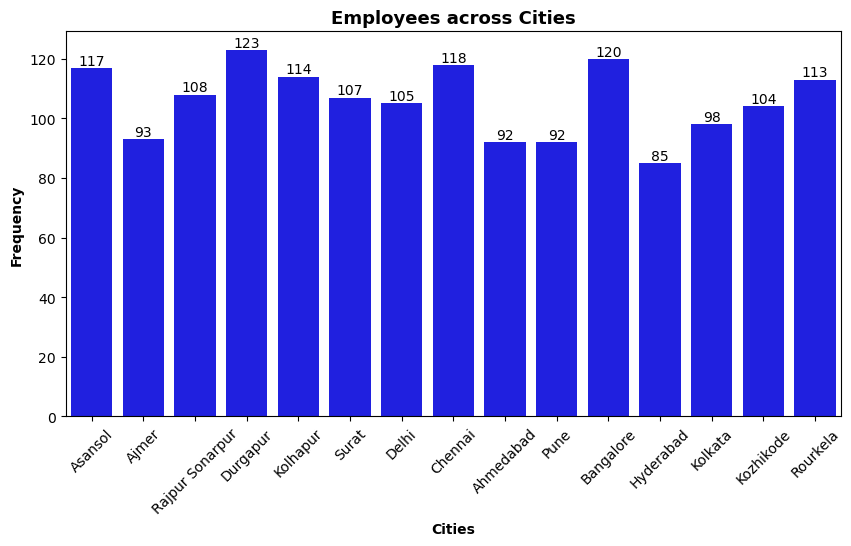

In [34]:
plt.figure(figsize=(10,5))
ax = sns.countplot( x = 'city' , data = emp_data, color = 'blue')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.title('Employees across Cities', fontsize = 13, fontweight="bold")
plt.xlabel('Cities', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")
plt.show()

In [35]:
print(emp_data['state'].value_counts())

West Bengal    446
Maharashtra    206
Karnataka      120
Tamil Nadu     118
Odisha         113
NA             107
Delhi          105
Kerala         104
Rajasthan       93
Gujarat         92
Telangana       85
Name: state, dtype: int64


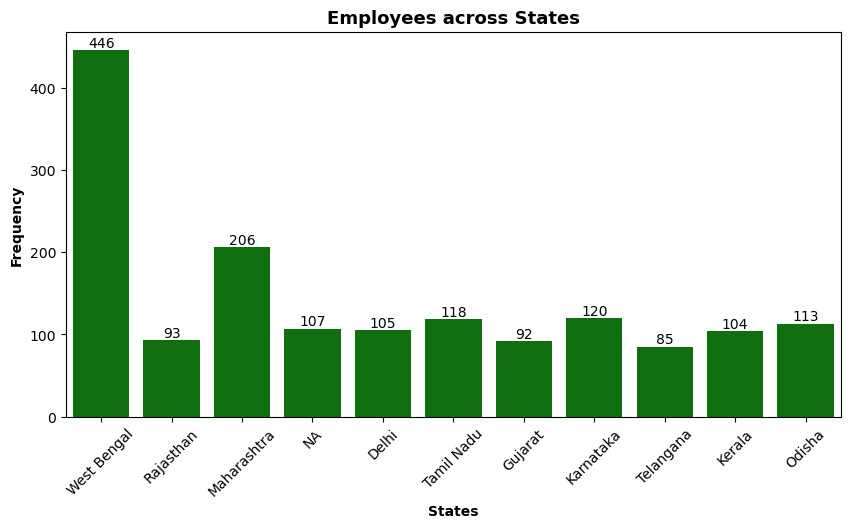

In [38]:
plt.figure(figsize=(10,5))
ax = sns.countplot( x = 'state' , data = emp_data, color = 'green')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.title('Employees across States', fontsize = 13, fontweight="bold")
plt.xlabel('States', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")
plt.show()

In [40]:
role = emp_data['role'].value_counts()
role

Executive    1261
Manager       328
Name: role, dtype: int64

In [41]:
role_percent = round((role/emp_data.shape[0])*100,2)
role_percent

Executive    79.36
Manager      20.64
Name: role, dtype: float64

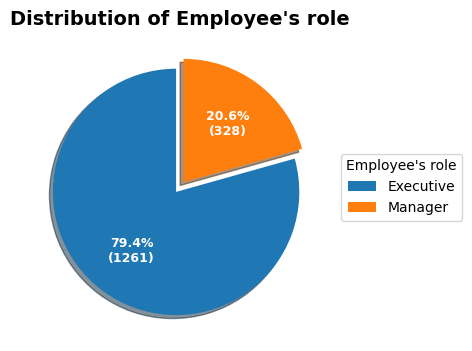

In [44]:
fig, ax = plt.subplots(figsize=[12,4])

labels = role.index
data = role.values

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

wedges, texts, autopcts = ax.pie(x= data, 
                        autopct=lambda pct: func(pct, data),
                        explode=[0.05]*len(role_percent),
                        shadow=True,
                        startangle = 90
                        )
# Adding legend
ax.legend(wedges, labels,
          title ="Employee's role",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':9})
plt.title("Distribution of Employee's role", fontsize=14, fontweight="bold");

In [48]:
job_changes = emp_data['previous_job_change'].value_counts()
job_changes

3    418
4    409
1    396
2    366
Name: previous_job_change, dtype: int64

In [49]:
job_changes_percent = round((job_changes/emp_data.shape[0])*100,2)
job_changes_percent

3    26.31
4    25.74
1    24.92
2    23.03
Name: previous_job_change, dtype: float64

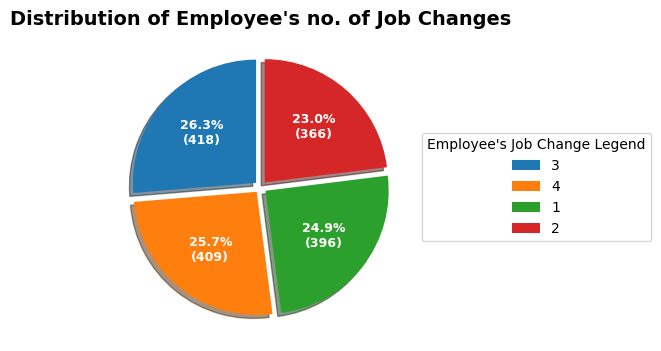

In [50]:
fig, ax = plt.subplots(figsize=[12,4])

labels = job_changes.index
data = job_changes.values

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

wedges, texts, autopcts = ax.pie(x= data, 
                        autopct=lambda pct: func(pct, data),
                        explode=[0.05]*len(job_changes_percent),
                        shadow=True,
                        startangle = 90
                        )
# Adding legend
ax.legend(wedges, labels,
          title ="Employee's Job Change Legend",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':9})
plt.title("Distribution of Employee's no. of Job Changes", fontsize=14, fontweight="bold");

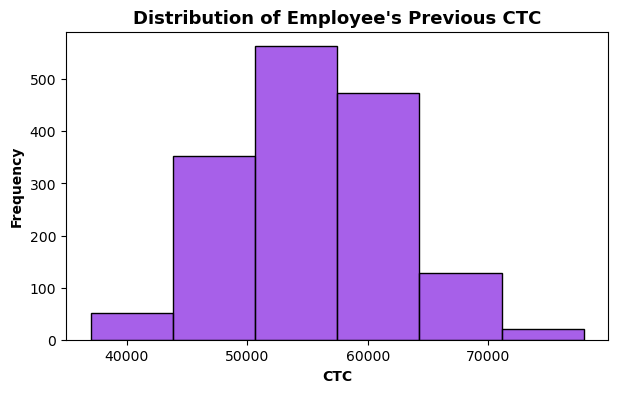

In [45]:
plt.figure(figsize=(7,4))
sns.histplot( x = 'previous_ctc' , data = emp_data, bins = 6, color= 'blueviolet')
plt.title("Distribution of Employee's Previous CTC", fontsize = 13, fontweight="bold")
plt.xlabel('CTC', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")
plt.show()

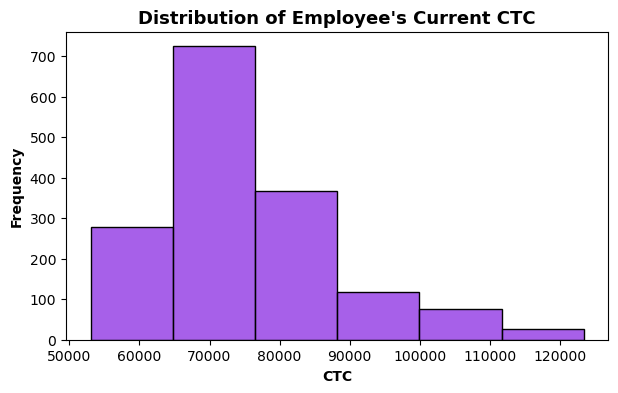

In [46]:
plt.figure(figsize=(7,4))
sns.histplot( x = 'ctc' , data = emp_data, bins = 6, color= 'blueviolet')
plt.title("Distribution of Employee's Current CTC", fontsize = 13, fontweight="bold")
plt.xlabel('CTC', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")
plt.show()

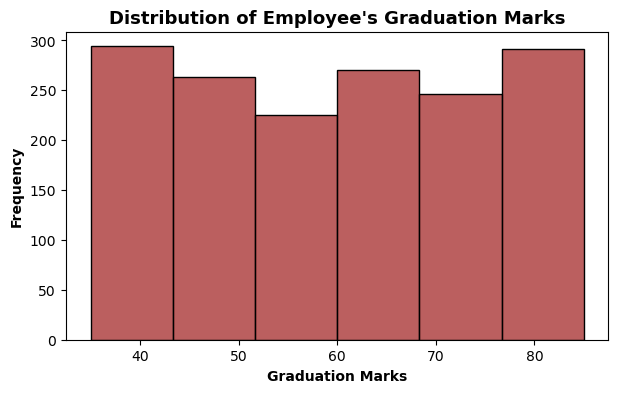

In [52]:
plt.figure(figsize=(7,4))
sns.histplot( x = 'graduation_marks' , data = emp_data, bins = 6, color= 'brown')
plt.title("Distribution of Employee's Graduation Marks", fontsize = 13, fontweight="bold")
plt.xlabel('Graduation Marks', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")
plt.show()

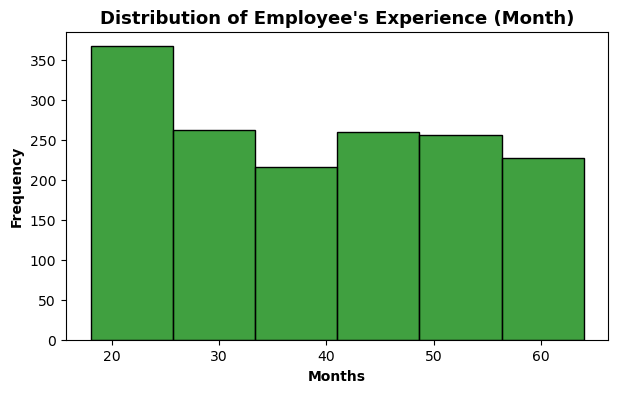

In [53]:
plt.figure(figsize=(7,4))
sns.histplot( x = 'exp_(month)' , data = emp_data, bins = 6, color= 'green')
plt.title("Distribution of Employee's Experience (Month)", fontsize = 13, fontweight="bold")
plt.xlabel('Months', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")
plt.show()

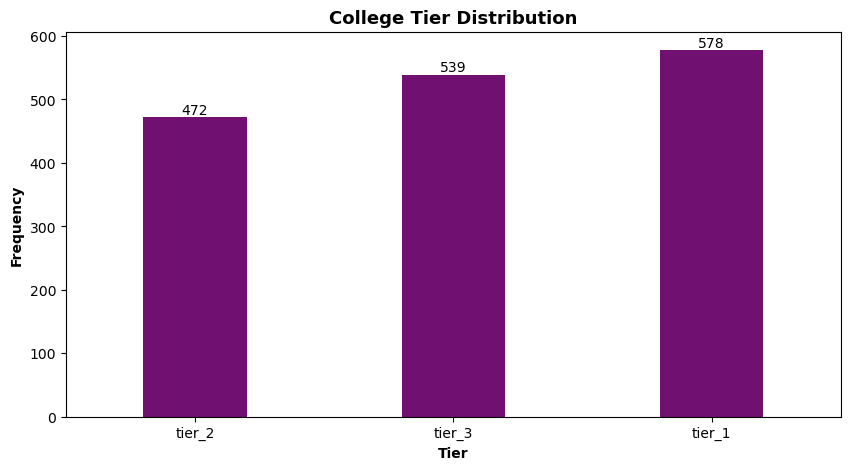

In [57]:
plt.figure(figsize=(10,5))
ax = sns.countplot( x = 'tier' , data = emp_data, color = 'purple', width = 0.4)
ax.bar_label(ax.containers[0])
plt.title('College Tier Distribution', fontsize = 13, fontweight="bold")
plt.xlabel('Tier', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")
plt.show()

In [56]:
emp_data['city_if_metro'].value_counts()

metro_city        817
non_metro_city    772
Name: city_if_metro, dtype: int64

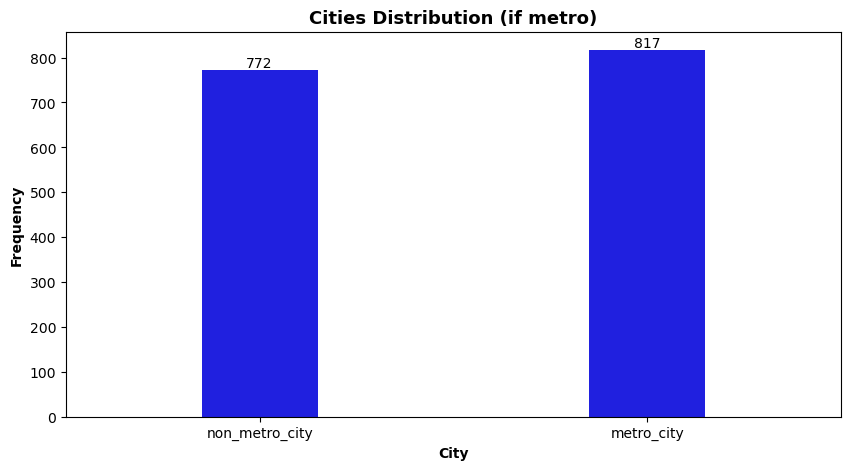

In [59]:
plt.figure(figsize=(10,5))
ax = sns.countplot( x = 'city_if_metro' , data = emp_data, color = 'blue', width = 0.3)
ax.bar_label(ax.containers[0])
plt.title('Cities Distribution (if metro)', fontsize = 13, fontweight="bold")
plt.xlabel('City', fontweight="bold")
plt.ylabel('Frequency', fontweight="bold")
plt.show()